In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)


n_students = 100

study_hours = np.random.uniform(0, 100, n_students)

In [3]:
study_hours

array([37.45401188, 95.07143064, 73.19939418, 59.86584842, 15.60186404,
       15.59945203,  5.80836122, 86.61761458, 60.11150117, 70.80725778,
        2.05844943, 96.99098522, 83.24426408, 21.23391107, 18.18249672,
       18.34045099, 30.4242243 , 52.47564316, 43.19450186, 29.12291402,
       61.18528947, 13.94938607, 29.21446485, 36.63618433, 45.60699842,
       78.51759614, 19.96737822, 51.42344384, 59.24145689,  4.64504127,
       60.75448519, 17.05241237,  6.5051593 , 94.88855373, 96.56320331,
       80.83973481, 30.46137692,  9.7672114 , 68.42330265, 44.01524937,
       12.20382348, 49.51769101,  3.43885211, 90.93204021, 25.87799816,
       66.25222844, 31.17110761, 52.00680212, 54.67102793, 18.48544555,
       96.95846278, 77.51328234, 93.94989416, 89.48273504, 59.78999788,
       92.1874235 ,  8.84925021, 19.59828624,  4.52272889, 32.53303308,
       38.86772897, 27.13490318, 82.87375092, 35.67533267, 28.09345097,
       54.26960832, 14.0924225 , 80.21969808,  7.45506437, 98.68

In [4]:
true_slope = 7    #defining
true_intercept = 30    #defining intercept


noise = np.random.normal(0, 5, n_students)
marks = true_slope * study_hours + true_intercept + noise

In [5]:
marks

array([292.61331853, 694.00497773, 542.85456315, 439.12309436,
       138.11468887, 140.98172709,  78.04799874, 633.73195095,
       446.73804021, 523.14201924,  48.9861566 , 710.58065206,
       610.06104754, 181.20371464, 157.76286479, 163.22638185,
       239.4593046 , 395.69119141, 330.40097228, 226.5428234 ,
       459.77762769, 128.95097882, 234.52682126, 285.28035464,
       342.17213524, 577.51994636, 168.05807493, 385.95272054,
       443.88376965,  64.53554319, 464.71232584, 150.23977565,
        76.82386704, 693.8476465 , 696.34856708, 595.7455743 ,
       243.53078947, 110.68669037, 508.00131373, 339.61448233,
       115.25320554, 370.78044689,  59.78607885, 670.28394662,
       215.10114686, 489.21866177, 255.21172482, 387.03835951,
       415.63148101, 170.350397  , 703.75655781, 569.7614877 ,
       688.14751592, 653.86176703, 440.77666801, 675.65477939,
        86.63323287, 169.55596585,  57.06198107, 265.48090356,
       298.15783632, 218.33401466, 614.18384249, 273.57

In [6]:
regression_df = pd.DataFrame({
    'Study Hours': study_hours,
    'Marks': marks
})

In [7]:
regression_df.head()

,Study Hours,Marks
0,37.454012,292.613319
1,95.071431,694.004978
2,73.199394,542.854563
3,59.865848,439.123094
4,15.601864,138.114689


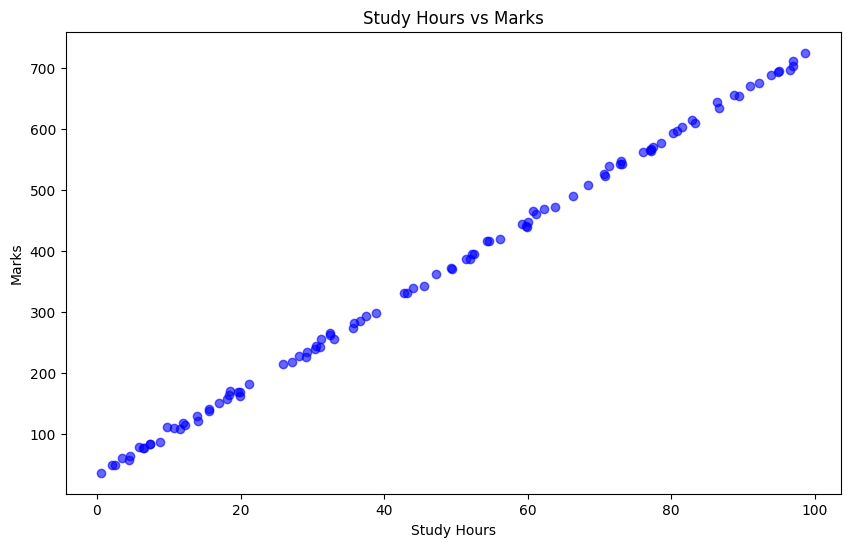

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(regression_df['Study Hours'], regression_df['Marks'], color='blue', alpha=0.6)
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Study Hours vs Marks')
plt.show()

In [9]:
x = regression_df[['Study Hours']]
y = regression_df['Marks']

In [10]:
x.head()


,Study Hours
0,37.454012
1,95.071431
2,73.199394
3,59.865848
4,15.601864


In [11]:
y.head()

0    292.613319
1    694.004978
2    542.854563
3    439.123094
4    138.114689
Name: Marks, dtype: float64

In [12]:
print("before split")
print("Study Hours shape:", {x.shape})
print("Marks shape:", {y.shape})

before split
Study Hours shape: {(100, 1)}
Marks shape: {(100,)}


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
print(f"x_train shape:", {x_train.shape})
print(f"x_test shape:", {x_test.shape})
print(f"y_train shape:", {y_train.shape})
print(f"y_test shape:", {y_test.shape})

x_train shape: {(80, 1)}
x_test shape: {(20, 1)}
y_train shape: {(80,)}
y_test shape: {(20,)}


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)







,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
print(model.coef_[0])
print(model.intercept_)

6.979932365748031
30.714566597292617


In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred
y_test

83     77.773613
53    653.861767
70    564.386585
45    489.218662
44    215.101147
39    339.614482
22    234.526821
80    643.501271
10     48.986157
0     292.613319
18    330.400972
30    464.712326
73    602.307923
33    693.847646
90    117.826273
4     138.114689
76    566.489119
77     82.992525
12    610.061048
31    150.239776
Name: Marks, dtype: float64

In [19]:
compare = pd.DataFrame({
    'Actual Marks': y_test,
    'Predicted Marks': y_pred
})

In [20]:
compare

,Actual Marks,Predicted Marks
83,77.773613,75.077865
53,653.861767,655.298005
70,564.386585,569.736193
45,489.218662,493.150640
44,215.101147,211.341244
39,339.614482,337.938030
22,234.526821,234.629555
80,643.501271,633.154920
10,48.986157,45.082404
0,292.613319,292.141036


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [22]:
print(f"model coefficient (model learned):{model.coef_[0]:.2f}")
print(f"model intercept (model learned):{model.intercept_:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

model coefficient (model learned):6.98
model intercept (model learned):30.71
Mean Squared Error: 16.34
R-squared: 1.00


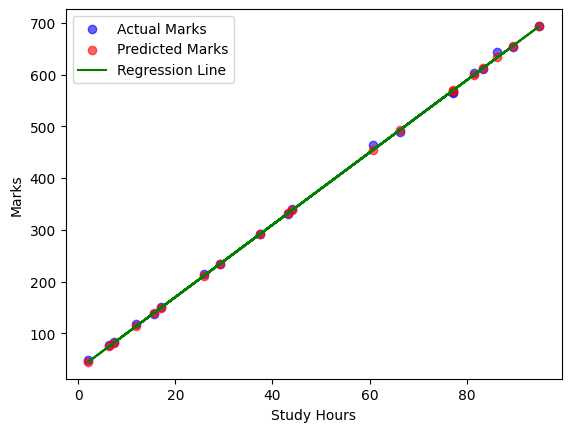

In [23]:
plt.scatter(x_test, y_test, color='blue', label='Actual Marks', alpha = 0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicted Marks', alpha = 0.6)
plt.plot(x_test, y_pred, color='green', label='Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.legend()

In [24]:
#x_test

In [25]:
new_study_hours = 6.5

predicted_marks = model.predict([[new_study_hours]])

c:\Users\HP VICTUS\OneDrive\Documents\PROGRAM\ML\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print(f"If a student studies for {new_study_hours} hours, then his/her predicted marks are: {predicted_marks[0]:.2f}")

If a student studies for 6.5 hours, then his/her predicted marks are: 76.08
